## Kernel density function

In [5]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt


In [171]:
%store -r ops_business

In [172]:
ops_business.head()

,out,in,sum,date,ds,is_holiday,y
date,,,,,,,
2020-09-24,1.0,0.0,-1.0,2020-09-24,2020-09-24,False,1.0
2020-09-25,1.0,1.0,0.0,2020-09-25,2020-09-25,False,1.0
2020-09-26,0.0,0.0,0.0,2020-09-26,2020-09-26,True,0.0
2020-09-27,0.0,0.0,0.0,2020-09-27,2020-09-27,True,0.0
2020-09-28,1.0,1.0,0.0,2020-09-28,2020-09-28,False,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

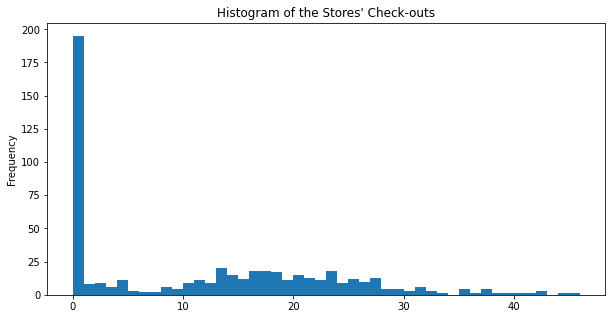

In [173]:
# Daily marginal change distribution 
plt.figure(figsize=(10,5))
ops_business['out'].plot.hist(bins=range(0,int(ops_business['out'].max())))
plt.title("Histogram of the Stores' Check-outs")
plt.show

As seen above on the plot, the store has many zero check-outs. 

### Scikit-learn KDE
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py

https://scikit-learn.org/stable/modules/density.html

In [179]:
min(ops_business.index), max(ops_business.index)

(datetime.date(2020, 9, 24), datetime.date(2022, 3, 4))

<function matplotlib.pyplot.show(close=None, block=None)>

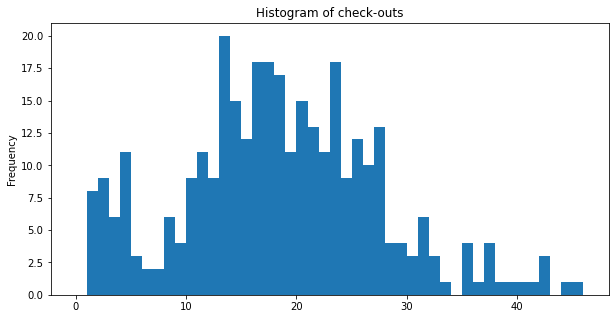

In [180]:
ops_business=ops_business[ops_business['out']>0] # remove zero check-outs
# Daily marginal change distribution 
plt.figure(figsize=(10,5))
ops_business['out'].plot.hist(bins=range(0,int(ops_business['out'].max())))
plt.title('Histogram of check-outs')
plt.show

In [181]:
import numpy as np
from sklearn.neighbors import KernelDensity

from sklearn.model_selection import GridSearchCV

# We work on the series of 2021
# define a day to divide the data set in two parts ; train, test
start_date=pd.to_datetime('20210101', format='%Y%m%d', errors='coerce')
break_date=pd.to_datetime('20220101', format='%Y%m%d', errors='coerce')

# create test dataset, break it at a date
# 2021 is train set, 2022 is test set
x_train = ops_business[(ops_business.index<break_date) & (ops_business.index>start_date)]['out'].values.reshape(-1,1)
x_test = ops_business[ops_business.index>=break_date]['out'].values.reshape(-1,1)





/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [182]:
max(ops_business['out'])

47.0

In [183]:
bins=list(range(0, int(max(ops_business['out']))))
rng=list(np.arange(int(min(ops_business['out'])), int(max(ops_business['out'])), 0.1))
rng=np.array(list(rng)).reshape(-1,1)
#rng=np.linspace(int(min(x_train)),int(max(x_train)), num=100).reshape(-1,1)
rng[:6]

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5]])

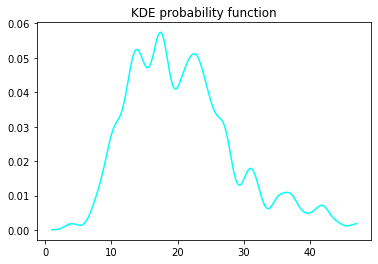

In [187]:
model = KernelDensity(kernel='gaussian', bandwidth=1)# default = guassian
model.fit(x_train)
log_dens = model.score_samples(rng)
probs = np.exp(log_dens)

plt.plot(rng,probs, color='cyan')
plt.title('KDE probability function')
plt.show()

In [188]:
#bins

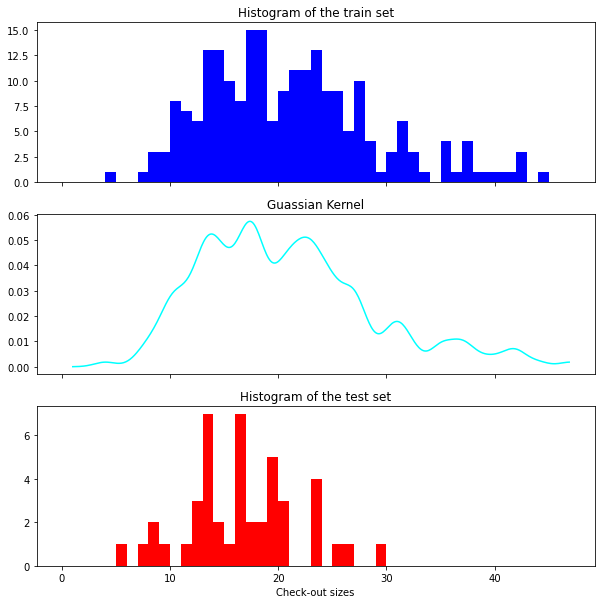

In [190]:

fig, [ax1, ax2,ax3] = plt.subplots(3, 1, sharex=True, figsize=(10,10))

ax1.hist(x_train,color='blue' ,label='train', bins=bins)
ax1.set_title('Histogram of the train set')
ax2.set_title("Guassian Kernel")
ax2.plot(rng, np.exp(model.score_samples(rng)), label='KDE function',c='cyan')

ax3.hist(x_test, color='red',label='test', bins=bins)
ax3.set_title('Histogram of the test set')
ax3.set_xlabel('Check-out sizes')
plt.show()

In [150]:
#print(np.trapz(probs.ravel(), x_test.ravel())) # https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

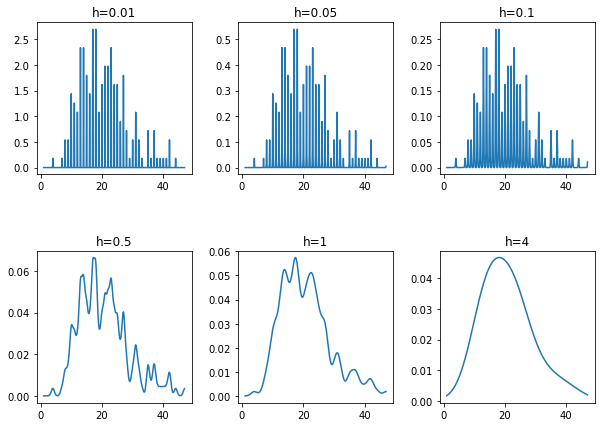

In [152]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(rng)
    probs = np.exp(score)
    plt.subplot(ind)
    #df=pd.DataFrame(x_test, probs, columns=['observation']).reset_index().\
    #rename(columns={'index':'prob'}).set_index('observation').drop_duplicates().sort_values('observation').reset_index()
    plt.plot(rng,probs)
    #plt.plot(df['observation'], df['prob'], c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

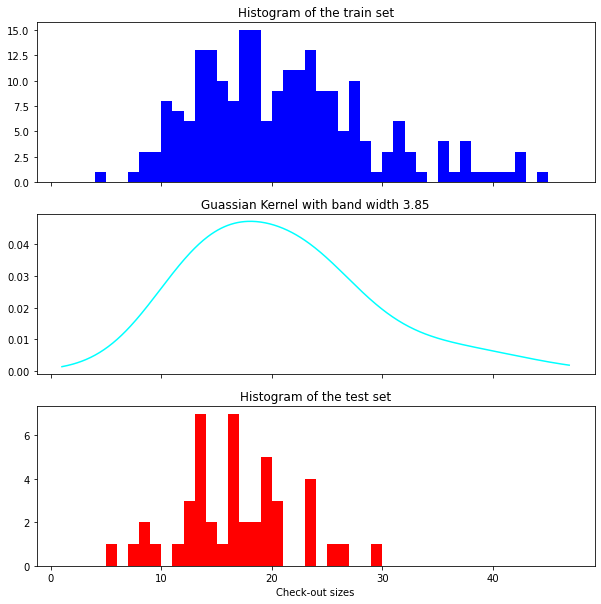

In [192]:

bandwidth = np.arange(0.05, 4, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)

bins=list(range(int(min(x_train)), int(max(x_train))))
fig, [ax1, ax2,ax3] = plt.subplots(3, 1, sharex=True, figsize=(10,10))

ax1.hist(x_train,color='blue' ,label='train', bins=bins)
ax1.set_title('Histogram of the train set')
ax2.set_title("Guassian Kernel with band width "+ "{:.2f}".format(kde.bandwidth))
ax2.plot(rng,np.exp(kde.score_samples(rng)), label='KDE function',c='cyan')

ax3.hist(x_test, color='red',label='test', bins=bins)
ax3.set_title('Histogram of the test set')
ax3.set_xlabel('Check-out sizes')
plt.show()



### Grid Search with Multiple Kernel Functions

In [57]:
# customized scoring function for Grid Search
def my_scores(estimator,X):
    scores = estimator.score_samples(x_test)
    # Remove -inf
    scores = scores[scores != float('-inf')]
    # Return the mean values
    return np.mean(scores)


In [58]:
# Available kernels in Scikit-learn
kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
h_vals = np.arange(0.1, 10, .1)

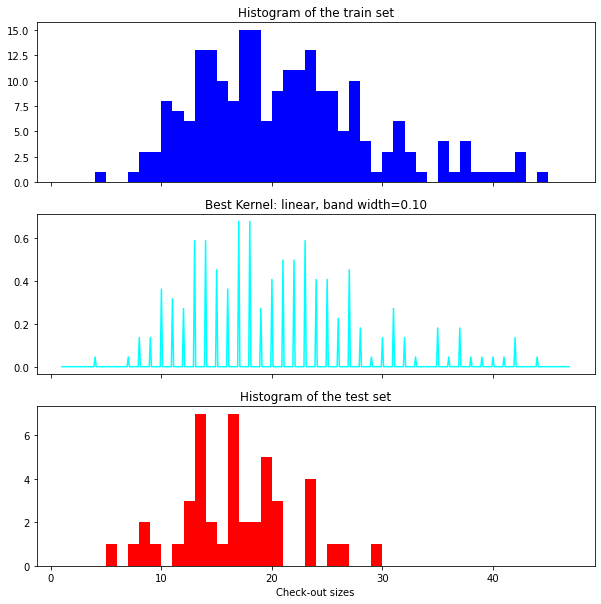

In [163]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': h_vals, 'kernel': kernels},
                   scoring=my_scores)
grid.fit(x_train)
best_kde = grid.best_estimator_
log_dens = best_kde.score_samples(rng)




fig, [ax1, ax2,ax3] = plt.subplots(3, 1, sharex=True, figsize=(10,10))

ax1.hist(x_train,color='blue' ,label='train', bins=bins)
ax1.set_title('Histogram of the train set')
ax2.set_title("Best Kernel: " + best_kde.kernel+", band width="+"{:.2f}".format(best_kde.bandwidth))
ax2.plot(rng,np.exp(best_kde.score_samples(rng)), label='KDE function',c='cyan')

ax3.hist(x_test, color='red',label='test', bins=bins)
ax3.set_title('Histogram of the test set')
ax3.set_xlabel('Check-out sizes')
plt.show()

In [161]:
best_kde

KernelDensity(bandwidth=0.1, kernel='linear')

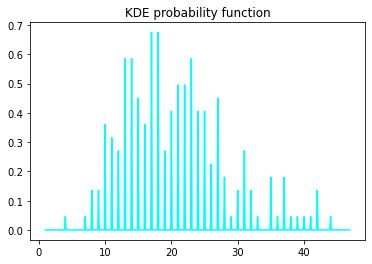

In [162]:
model = KernelDensity(kernel='linear', bandwidth=0.1)
model.fit(x_train)
log_dens = model.score_samples(rng)
probs = np.exp(log_dens)

plt.plot(rng,probs, color='cyan')
plt.title('KDE probability function')
plt.show()